To begin, we need to install and import BeautifulSoup and Pandas libraries if not already available. Try to import the libraries and if successful, print a success confirmation message. If not successful, install both libraries, import them, and print a success message for installation and importing.

In [ ]:
try:
    from bs4 import BeautifulSoup
    import pandas as pd
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


Find the webpage that you'd like to scrape data from.

*   Initialize a BeautifulSoup object to read and parse the webpage of your choice
*   Print a success message when successfully loaded and parsed.

In [ ]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


Scrape the raw data from the webpage.

*   Define a list where the raw data will be kept.
*   Create a table and find the table on the webpage, use the index if there are more than one table on the page to scrape from the appropriate one.
*   Read the table line by line using a for loop and append each row's data to the raw_data list.
*   Print the raw_data list




In [ ]:
# Define an empty list where the data will be kept
raw_data = []

# Find all the tables in the webpage page that we have just parsed
table = bs.find_all("table")[4]

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data)

['\n', "\n2022rank\n\nCity\n\nState[c]\n\n2022estimate\n\n2020census\n\nChange\n\n2020 land area\n\n2020 population density\n\nLocation\n\n\n1\n\nNew York[d]\n\nNew York\n\n8,335,897\n\n8,804,190\n\n−5.32%\n\n300.5\xa0sq\xa0mi\n\n778.3\xa0km2\n\n29,298/sq\xa0mi\n\n11,312/km2\n\n40°40′N 73°56′W\ufeff / \ufeff40.66°N 73.94°W\ufeff / 40.66; -73.94\ufeff (New York City)\n\n\n2\n\nLos Angeles\n\nCalifornia\n\n3,822,238\n\n3,898,747\n\n−1.96%\n\n469.5\xa0sq\xa0mi\n\n1,216.0\xa0km2\n\n8,304/sq\xa0mi\n\n3,206/km2\n\n34°01′N 118°25′W\ufeff / \ufeff34.02°N 118.41°W\ufeff / 34.02; -118.41\ufeff (Los Angeles)\n\n\n3\n\nChicago\n\nIllinois\n\n2,665,039\n\n2,746,388\n\n−2.96%\n\n227.7\xa0sq\xa0mi\n\n589.7\xa0km2\n\n12,061/sq\xa0mi\n\n4,657/km2\n\n41°50′N 87°41′W\ufeff / \ufeff41.84°N 87.68°W\ufeff / 41.84; -87.68\ufeff (Chicago)\n\n\n4\n\nHouston\n\nTexas\n\n2,302,878\n\n2,304,580\n\n−0.07%\n\n640.4\xa0sq\xa0mi\n\n1,658.6\xa0km2\n\n3,599/sq\xa0mi\n\n1,390/km2\n\n29°47′N 95°23′W\ufeff / \ufeff29.79°N

Put data into dataframe
*   Define the column names in a new list containing all column names from the table. Rename them as necessary or relevant for data interpretation.
*   Create an empty list for final data.
*   Find data for columns by looking through the webpage's html and appropriate html tag, which contains all the data for columns.
*   For each row, read through the data and strip data and append to that row's data
*   Create a Pandas dataframe for the final data and set column names to previously defined list of column names
*   Show dataframe

In [ ]:
column_names = ["City",
           "State", "2022 Estimate",
           "2020 Census","Percent Change",
           "2020 land area in sq mi", "2020 land area in sq km", "2020 population density per sq mi",
           "2020 population density per sq km","Location"]
final_data = []

column_data = table.find_all("tr")

for row in column_data:
  row_data = row.find_all('td')
  individual_row_data = [data.text.strip() for data in row_data]
  final_data.append(individual_row_data)

final_data = pd.DataFrame(final_data)
final_data.columns = column_names
final_data

,City,State,2022 Estimate,2020 Census,Percent Change,2020 land area in sq mi,2020 land area in sq km,2020 population density per sq mi,2020 population density per sq km,Location
0,None,None,None,None,None,None,None,None,None,None
1,New York[d],New York,"8,335,897","8,804,190",−5.32%,300.5 sq mi,778.3 km2,"29,298/sq mi","11,312/km2",40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; ...
2,Los Angeles,California,"3,822,238","3,898,747",−1.96%,469.5 sq mi,"1,216.0 km2","8,304/sq mi","3,206/km2",34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02...
3,Chicago,Illinois,"2,665,039","2,746,388",−2.96%,227.7 sq mi,589.7 km2,"12,061/sq mi","4,657/km2",41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; ...
4,Houston,Texas,"2,302,878","2,304,580",−0.07%,640.4 sq mi,"1,658.6 km2","3,599/sq mi","1,390/km2",29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; ...
...,...,...,...,...,...,...,...,...,...,...
329,Albany,New York,"100,826","99,224",+1.61%,21.4 sq mi,55.4 km2,"4,637/sq mi","1,790/km2",42°40′N 73°48′W﻿ / ﻿42.67°N 73.80°W﻿ / 42.67; ...
330,Hesperia,California,"100,744","99,818",+0.93%,72.7 sq mi,188.3 km2,"1,373/sq mi",530/km2,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40...
331,New Bedford,Massachusetts,"100,682","101,079",−0.39%,20.0 sq mi,51.8 km2,"5,054/sq mi","1,951/km2",41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; ...
332,Davenport,Iowa,"100,486","101,724",−1.22%,63.8 sq mi,165.2 km2,"1,594/sq mi",615/km2,41°34′N 90°36′W﻿ / ﻿41.56°N 90.60°W﻿ / 41.56; ...


* Check for duplicates and print amount of duplicates existing in the final data
*   Delete duplicate rows from final data
*   Print message displaying amount of duplicates after deleting duplicates, which should be 0



In [ ]:
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


*   Inspect the data and check for any noisy entries.
*   Check to make sure that the number of entries is equal to number of non-null entries.

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 333
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City                               333 non-null    object
 1   State                              333 non-null    object
 2   2022 Estimate                      333 non-null    object
 3   2020 Census                        333 non-null    object
 4   Percent Change                     333 non-null    object
 5   2020 land area in sq mi            333 non-null    object
 6   2020 land area in sq km            333 non-null    object
 7   2020 population density per sq mi  333 non-null    object
 8   2020 population density per sq km  333 non-null    object
 9   Location                           333 non-null    object
dtypes: object(10)
memory usage: 28.7+ KB


There are 334 rows but 333 non-null entries, so we delete the row with NULL entries. Inspect info to ensure that all NULL entries were deleted.

In [ ]:
final_data = final_data.dropna()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 333
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City                               333 non-null    object
 1   State                              333 non-null    object
 2   2022 Estimate                      333 non-null    object
 3   2020 Census                        333 non-null    object
 4   Percent Change                     333 non-null    object
 5   2020 land area in sq mi            333 non-null    object
 6   2020 land area in sq km            333 non-null    object
 7   2020 population density per sq mi  333 non-null    object
 8   2020 population density per sq km  333 non-null    object
 9   Location                           333 non-null    object
dtypes: object(10)
memory usage: 28.6+ KB


Additional transformations:
*   Define a function to clean and convert strings
*   Use the .replace action to replace or remove any unnecessary strings and convert the columns into floats
*   Use the import string to import the alphabet lowercase in order to remove superscript text next to city names and clean data
*   Display final data



In [32]:
import string

def clean_string_and_convert(s):
    s = str(s).replace("\xa0sq\xa0mi","")
    s = str(s).replace(",","")
    s = str(s).replace("\xa0km2","")
    s = str(s).replace("/sq\xa0mi","")
    s = str(s).replace("/km2","")
    for c in string.ascii_lowercase:
      s = str(s).replace("["+c,"")
    s = str(s).replace("]","")
    s = str(s).replace("%","")
    converted = s
    return converted

final_data["City"] = final_data["City"].apply(clean_string_and_convert)
final_data["2022 Estimate"] = final_data["2022 Estimate"].apply(clean_string_and_convert).astype(float)
final_data["2020 Census"] = final_data["2020 Census"].apply(clean_string_and_convert).astype(float)
final_data["Percent Change"] = final_data["Percent Change"].apply(clean_string_and_convert)
final_data["2020 land area in sq mi"] = final_data["2020 land area in sq mi"].apply(clean_string_and_convert).astype(float)
final_data["2020 land area in sq km"] = final_data["2020 land area in sq km"].apply(clean_string_and_convert).astype(float)
final_data["2020 population density per sq mi"] = final_data["2020 population density per sq mi"].apply(clean_string_and_convert).astype(float)
final_data["2020 population density per sq km"] = final_data["2020 population density per sq km"].apply(clean_string_and_convert).astype(float)

final_data

,City,State,2022 Estimate,2020 Census,Percent Change,2020 land area in sq mi,2020 land area in sq km,2020 population density per sq mi,2020 population density per sq km,Location
1,New York,New York,8335897.0,8804190.0,−5.32,300.5,778.3,29298.0,11312.0,40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; ...
2,Los Angeles,California,3822238.0,3898747.0,−1.96,469.5,1216.0,8304.0,3206.0,34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02...
3,Chicago,Illinois,2665039.0,2746388.0,−2.96,227.7,589.7,12061.0,4657.0,41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; ...
4,Houston,Texas,2302878.0,2304580.0,−0.07,640.4,1658.6,3599.0,1390.0,29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; ...
5,Phoenix,Arizona,1644409.0,1608139.0,+2.26,518.0,1341.6,3105.0,1199.0,33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57...
...,...,...,...,...,...,...,...,...,...,...
329,Albany,New York,100826.0,99224.0,+1.61,21.4,55.4,4637.0,1790.0,42°40′N 73°48′W﻿ / ﻿42.67°N 73.80°W﻿ / 42.67; ...
330,Hesperia,California,100744.0,99818.0,+0.93,72.7,188.3,1373.0,530.0,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40...
331,New Bedford,Massachusetts,100682.0,101079.0,−0.39,20.0,51.8,5054.0,1951.0,41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; ...
332,Davenport,Iowa,100486.0,101724.0,−1.22,63.8,165.2,1594.0,615.0,41°34′N 90°36′W﻿ / ﻿41.56°N 90.60°W﻿ / 41.56; ...


Store the DataFrame table created on the local disk as a .csv file to be used later using Pandas dataframes.

In [33]:
final_data.to_csv("List_of_United_States_Cities_by_Population.csv")

Read the csv just saved and load back as a dataframe.

In [ ]:
US_cities_df = pd.read_csv("List_of_United_States_Cities_by_Population.csv")


Import libraries scipy and pyplot for data visualizations.

In [ ]:
## Import libraries
## if you see any import error, install libraries through pip install command
import scipy
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")

Imported all libraries successfully...


To study the association between two variables, calculate the correlation coefficient.
*   Import pearsonr from scipy.stats
*   Calculate the coefficient using the two columns/variables that we want to compare

Below we see a weak correlation between 2020 census population and 2020 land area in square miles.2020 census population and the land area are not very strongly correlated at 0.3636 showing a weaker positive correlation, indicating that a greater land area does not necessarily result in greater population.




In [ ]:
from scipy.stats import pearsonr

p = pearsonr(US_cities_df["2020 Census"],US_cities_df["2020 land area in sq mi"])
print (p[0])

0.3636020585067414


Create a scatterplot to compare 2020 Census population data and 2020 land area in square miles.
*   Define both columns and their associated column in the dataframe
*   Use the plt.scatter to compare both columns and define the marker
*   Define the x and y-axis labels, along with their units, for the scatterplot graph, as well as the plot title


Text(0.5, 1.0, 'population-vs-land area in 2020')

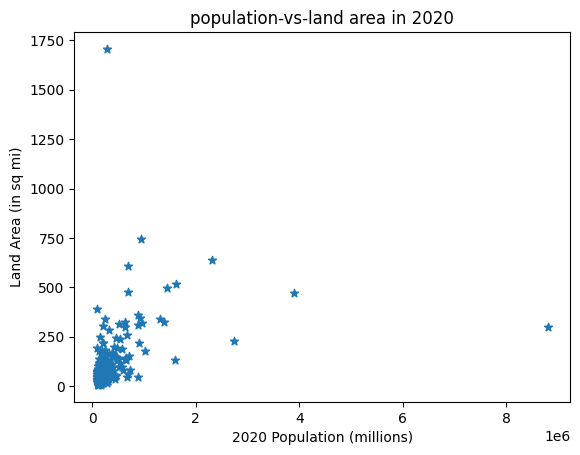

In [ ]:
population_column = US_cities_df["2020 Census"]
land_column = US_cities_df["2020 land area in sq mi"]

plt.scatter(population_column,land_column, marker="*")

plt.xlabel("2020 Population (millions)")
plt.ylabel("Land Area (in sq mi)")

# We can add a title too
plt.title("population-vs-land area in 2020")

As predicted by our correlation coefficient above, there does not seem to be a strong correlation between population and land area as shown by the spread of the points on the plot. There are also a few outliers, either with a large land area and small population or vice versa. There is a visible concentration of smaller cities that have similar populations and land areas.

Print the census population and obtain some basic descriptive statistics about a column from the dataframe that will then be used to help interpret a boxplot.

In [30]:
census_population = US_cities_df["2020 Census"]
print (census_population)
census_population.describe()

0      8804190.0
1      3898747.0
2      2746388.0
3      2304580.0
4      1608139.0
         ...    
328      99224.0
329      99818.0
330     101079.0
331     101724.0
332     104901.0
Name: 2020 Census, Length: 333, dtype: float64


count    3.330000e+02
mean     2.933924e+05
std      5.860932e+05
min      8.995600e+04
25%      1.163170e+05
50%      1.559840e+05
75%      2.625270e+05
max      8.804190e+06
Name: 2020 Census, dtype: float64

Create a boxplot to find the summary of the dataset for a specific variable, in this case, 2020 census population data.
*   Define the variable/column that you want the boxplot to plot
*   Define the x and y-axis labels, along with their units, for the scatterplot graph, as well as the plot title


Text(0.5, 1.0, '2020 Census Population Data')

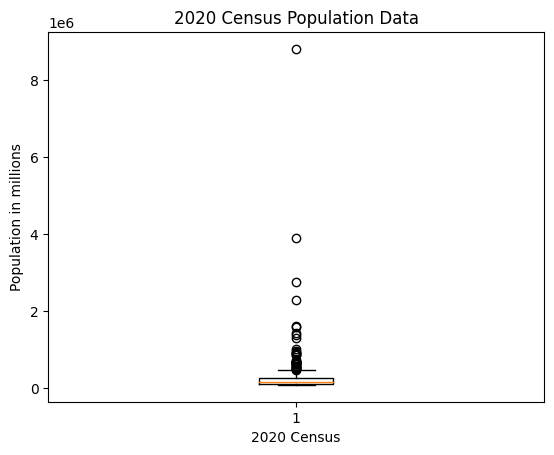

In [ ]:
population_column = US_cities_df["2020 Census"]

plt.boxplot(population_column)

plt.xlabel("2020 Census")
plt.ylabel("Population in millions")
plt.title("2020 Census Population Data")

In the boxplot, we can see that first to third quartiles remain between 0 and 100,000 people in cities, and there are a few outliers above 200,000 people and only one outlying city, which is also the maximum, with a population over 800,000 people.Population generally skews towards the minimum compared to the maximum, making the maximum and larger values outliers.